In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scipy
import statsmodels.formula.api as smf
import random
from scipy.stats import iqr
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression


In [2]:
df_salary = pd.read_csv('salary .csv')
df_salary

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
509,45906.0,6,17,11,0.92,1,0,2,0,2,70
510,60402.0,6,19,7,0.86,1,0,3,0,1,72
511,53187.0,19,7,6,0.78,1,0,3,0,4,76
512,56542.0,8,20,10,0.78,1,0,3,0,2,78


In [3]:
#Rename as per metadata\n",
df_salary =df_salary.rename(columns ={'male':'gender', 'experior':'Experience', 'yearsabs':'years_absent'})
df_salary.gender = ['male' if i == 1 else 'female' for i in df_salary.gender]
df_salary.position = ['Jnr_employee' if i == 1 else 'Manager' if  i == 2 else 'Executive' for i in df_salary.position]
df_salary.Field = ['Engineering' if i == 1 else 'Finance' if i == 2 else 'Human Resource' for i in df_salary.Field]    
df_salary.shape

(514, 11)

In [4]:
#$observing null values\n",
null_values= df_salary.isnull().sum()
null_values

salary          1
exprior         0
yearsworked     0
yearsrank       0
market          0
degree          0
otherqual       0
position        0
gender          0
Field           0
years_absent    0
dtype: int64

In [5]:
df_salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,years_absent
0,53000.0,0,0,0,1.17,1,0,Jnr_employee,male,Human Resource,0
1,58000.0,1,0,0,1.24,1,0,Jnr_employee,male,Finance,0
2,45500.0,0,0,0,1.21,1,0,Jnr_employee,male,Human Resource,2
3,35782.0,0,2,1,0.99,1,0,Jnr_employee,male,Human Resource,1
4,34731.0,0,2,2,0.91,1,0,Jnr_employee,male,Human Resource,1


Above is the sheet of *salaries earned by different employees in a company, the years worked, the years spent on the current rank, gender, qualifications and the positions* that these employees posess.
There are **514 entries/observation** in this dataset meaning that **514 employees'** data is recorded.There is **one null value** in *Salary column*.
   

#### Below is a summary statistics showing the statistics for every column in the data frame

In [6]:
df_salary.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,years_absent
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,118.000000


In [7]:
#Splitting the data into the train and test set"
df_sample = df_salary.loc[:,['salary','yearsworked']]
df_sample.head()

,salary,yearsworked
0,53000.0,0
1,58000.0,0
2,45500.0,0
3,35782.0,2
4,34731.0,2


In [8]:
train = np.random.rand(len(df_sample)) < 0.8
df_train = df_sample[train]
df_test = df_sample[~train]
'The length of the train sample is %s'% len(df_train)

'The length of the train sample is 404'

In [9]:
'And that of the test sample is %s'%len(df_test)

'And that of the test sample is 110'

In [10]:
df_train

,salary,yearsworked
0,53000.0,0
1,58000.0,0
2,45500.0,0
3,35782.0,2
5,56000.0,0
...,...,...
509,45906.0,17
510,60402.0,19
511,53187.0,7
512,56542.0,20


In [11]:
df_test

,salary,yearsworked
4,34731.00000,2
7,39986.00000,2
8,36308.00000,2
9,55000.00000,0
21,32000.00000,0
...,...,...
484,42813.00000,10
486,52773.00000,28
493,44410.85547,12
501,50280.00000,22


In [12]:
df_test

,salary,yearsworked
4,34731.00000,2
7,39986.00000,2
8,36308.00000,2
9,55000.00000,0
21,32000.00000,0
...,...,...
484,42813.00000,10
486,52773.00000,28
493,44410.85547,12
501,50280.00000,22


No handles with labels found to put in legend.


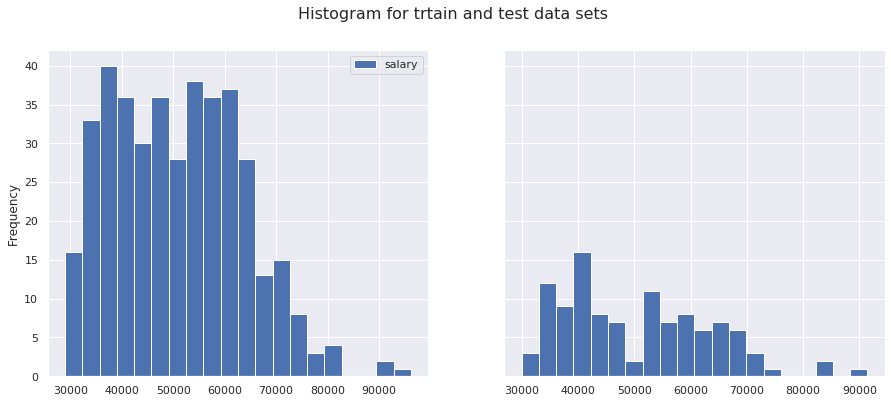

In [13]:
sns.set()
fig, axs = plt.subplots(1, 2, sharey=True,figsize=(15, 6))
_ = df_train.plot(kind='hist', x='yearsworked', ax=axs[0],bins = 20)
_.set_xticks([30000,40000,50000,60000,70000,80000,90000])
plt.legend().remove()
df_test.plot(kind='hist', x='yearsworked', ax=axs[1], bins = 20)   
plt.legend().set_visible(False)
fig.suptitle('Histogram for trtain and test data sets', fontsize=16)
plt.show()

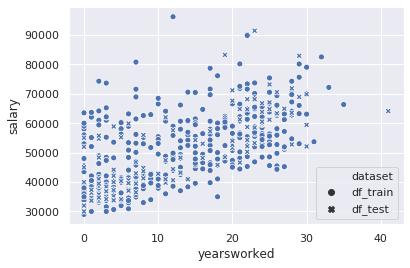

In [14]:
concatenated = pd.concat([df_train.assign(dataset='df_train'), df_test.assign(dataset='df_test')])
sns.set()
sns.scatterplot(x='yearsworked', y='salary', data=concatenated, style='dataset')
plt.show()

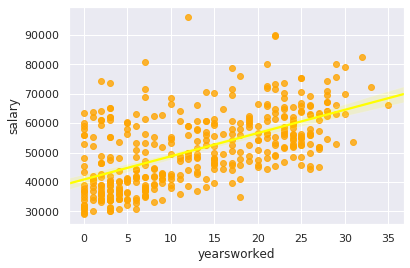

In [15]:
sns.set()
sns.regplot(x='yearsworked', y='salary', data=df_train, scatter_kws={"color": "orange"}, line_kws={"color": "Yellow"})
plt.show()

In [16]:
#Check for outliers:Train
q75_train, q25_train = np.percentile(df_train['salary'], [75 ,25])
iqr_train = q75_train - q25_train
lower_train_bound = q25_train - iqr_train*1.5
upper_train_bound = q75_train + iqr_train*1.5


In [17]:
# #Check for outliers: Test
# q75_test, q25_test = np.percentile(df_test.salary, [75 ,25])
# iqr_test = q75_test - q25_test
# lower_test_bound = q25_test - iqr_test*1.5
# upper_test_bound = q75_test + iqr_test*1.5

In [18]:
upper_train_bound 

90147.75

In [19]:
df_train['Is_it_an_extreme'] = ['Yes' if i < lower_train_bound else 'Yes' if i > upper_train_bound else "No" for i in df_train.salary]

/home/recruit/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_outliers = df_train[df_train.Is_it_an_extreme == 'Yes']

In [21]:
df_outliers

,salary,yearsworked,Is_it_an_extreme
377,96156.0,12,Yes


### Creating a model

In [22]:
import statsmodels.formula.api as smf

# create a fitted model in one line
model = smf.ols(formula='salary ~ yearsworked', data=df_train).fit()

# print the coefficients
model.params

Intercept      40823.982730
yearsworked      790.469441
dtype: float64

**A 1 year increase in time worked results in 828.50"unit" increase in Salary.**

In [23]:

df_train['salary']=df_train.fillna(0)
coeffs = scipy.pearsonr(df_train.salary,df_train.yearsworked)
coeffsAre the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?

Object `first` not found.


/home/recruit/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**R > 0.6** Means there is a positive correlation between the variables

**R > 0.6** A moderate positive relationship

The correlation coefficient suggest that the data follows a linear relationship and it is normally distributed. The correlation coefficient is closer to 1 than it is to 0 which shows a moderate positive relationship between the two variables.

The **p_value** is too small and indicates strong evidence against the null hypothesis that the relationship between the variables is statistically significant since it is smaller than the *threshold* of the *P_value* of **p= 0.05**.

In [24]:
#R^2 

coeffs[0]**2
print(round(coeffs[0],2)**2, ' Shows that ',(round(coeffs[0],2)**2)*100,'% of the data fits the model. Also, R_squared is known as a coefficient of determination' )

0.3364  Shows that  33.64 % of the data fits the model. Also, R_squared is known as a coefficient of determination


This means 38,44% in employees’ salaries is accounted for by the number of years they have worked

### Unstandidized coefficient

R > 0.6 A moderate positive relationship

The correlation coefficient suggest that the data follows a linear relationship and it is normally distributed. The correlation coefficient is closer to 1 than it is to 0 which shows a moderate positive relationship between the two variables.



### Meaning of a confidence interval
A 95% confidence interval of the mean is a range with an upper and lower number calculated from a sample. Because the true population mean is unknown, this range describes possible values that the mean could be. If multiple samples were drawn from the same population and a 95% CI calculated for each sample, we would expect the population mean to be found within 95% of these intervals. CIs are sensitive to variability in the population (spread of values) and sample size. When used to compare the means of two or more treatment groups, a CI shows the magnitude of a difference between groups. This is helpful in understanding the statistical significance in Statistcs.

In [25]:
#standidize the data
df_train['salary'] = df_train['salary']/df_train['salary'].max()

/home/recruit/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


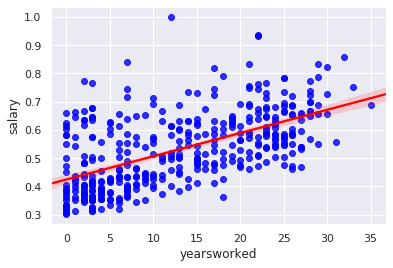

In [26]:
sns.set()
sns.regplot(x='yearsworked', y='salary', data=df_train, scatter_kws={"color": "blue"}, line_kws={"color": "Red"})
plt.show()

In [27]:
#Estimating a person that worked for 12 years

x = pd.DataFrame({'yearsworked':[12]})
x

,yearsworked
0,12


In [28]:
model.predict(x)

0    50309.61602
dtype: float64

In [29]:
#Estimating a person that worked for 80 years

y = pd.DataFrame({'yearsworked':[80]})
y

,yearsworked
0,80


In [30]:
model.predict(y)

0    104061.537993
dtype: float64

In [31]:
f'A person with most number of years employed %s' %df_salary.yearsworked.max()

'A person with most number of years employed 41'

### Are there any problems with this prediction? If so, what are they?
Yes, the model predicts the salary level that is bigger than the maximum salary in the data set. The model assumes that people can work indefinetly and hence the prediction, in reality, rarely does a person spend 80 years in the workforce. Even in the data set the person who have worked longer than the rest only worked for 41 years.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


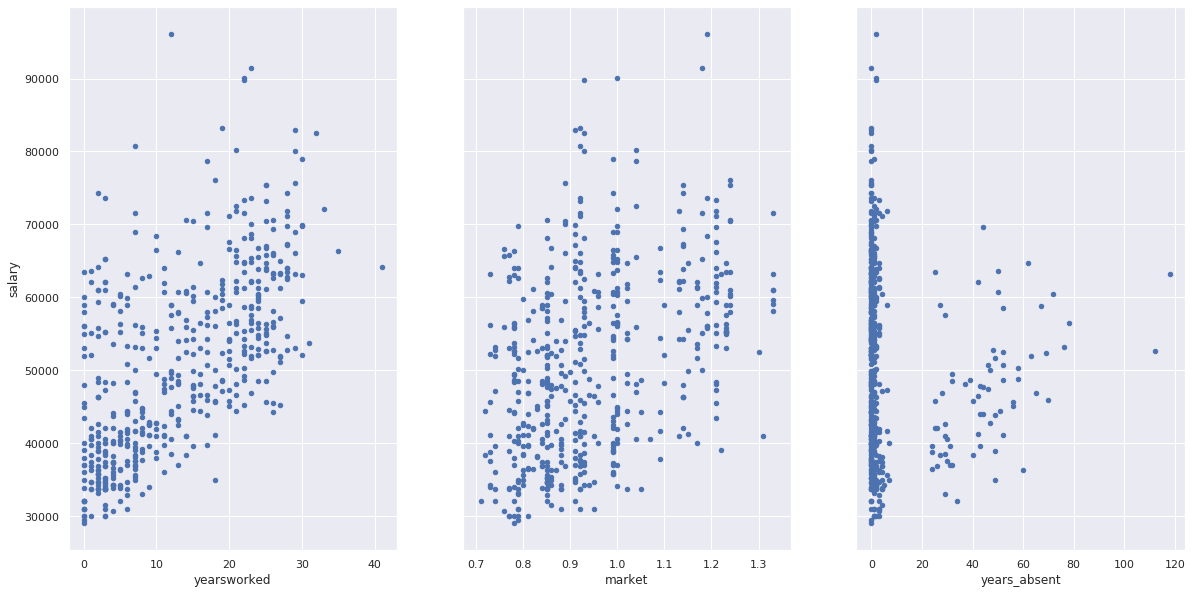

In [32]:
fig, axs = plt.subplots(1, 3, sharey=True)
df_salary.plot(kind='scatter', x='yearsworked', y='salary', ax=axs[0], figsize=(20, 10))
df_salary.plot(kind='scatter', x='market', y='salary', ax=axs[1])   
df_salary.plot(kind='scatter', x='years_absent', y='salary', ax=axs[2])
plt.show()

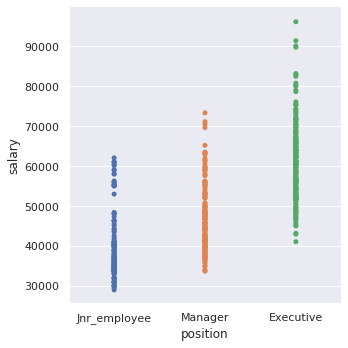

In [33]:
sns.set()
sns.catplot(x="position", y="salary", jitter=False,data=df_salary)
plt.show()

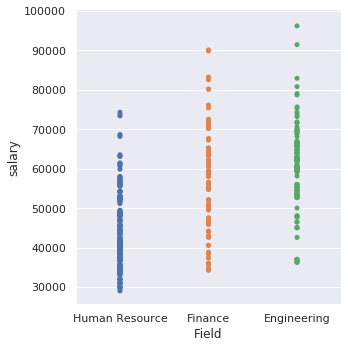

In [34]:
sns.catplot(x="Field", y="salary", jitter=False,data=df_salary)
plt.show()

In [35]:
df_train.head()

,salary,yearsworked,Is_it_an_extreme
0,0.551188,0,No
1,0.603186,0,No
2,0.473189,0,No
3,0.372124,2,No
5,0.582387,0,No


In [36]:
#Estimating a person that worked for 12 years

x = pd.DataFrame({'yearsworked':[13]})
x

,yearsworked
0,13


In [37]:
model.predict(x)

0    51100.085461
dtype: float64

In [38]:
51162.76-50325.47

837.2900000000009